# Rimple Singh

## Research question/interests

I will be looking to perform thorough analysis of the research data to visualize stock performances and draw conclusions from the visulaizations regarding market behavior. 

# Data Analysis

Upon reviewing the data files in our raw data folder, I have decided to use proces-split-adjusted.csv file for data analysis since it contains the relevant pricing data for our project.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import project_functions1 as p1 

In [2]:
# Import prices-split-adjusted.csv file from raw data directory for EDA
priceSplitDf = pd.read_csv('../data/raw/prices-split-adjusted.csv')

In [3]:
priceSplitDf.sort_values("date")

,date,symbol,open,close,low,high,volume
646,2010-01-04,SYMC,18.040001,18.400000,18.010000,18.530001,8322300.0
473,2010-01-04,IFF,41.509998,42.009998,41.500000,42.020000,286000.0
474,2010-01-04,ILMN,31.120001,30.549999,30.420000,31.230000,1793700.0
475,2010-01-04,INTC,20.790001,20.879999,20.730000,21.030001,47800900.0
476,2010-01-04,INTU,31.090000,30.809999,30.770000,31.150000,2353000.0
...,...,...,...,...,...,...,...
850922,2016-12-30,ES,55.599998,55.230000,55.070000,55.740002,1446800.0
850921,2016-12-30,EQT,65.699997,65.400002,65.050003,66.470001,1242100.0
850920,2016-12-30,EQR,63.590000,64.360001,63.189999,64.440002,1534000.0
850933,2016-12-30,EXR,75.669998,77.239998,75.110001,77.300003,884400.0


In [4]:
priceSplitDf.shape

(851264, 7)

In [5]:
priceSplitDf.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [6]:
priceSplitDf.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [7]:
priceSplitDf.columns

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')

In [8]:
priceSplitDf.nunique(axis=0)

date        1762
symbol       501
open       97522
close      98520
low        97470
high       97784
volume    171073
dtype: int64

In [9]:
priceSplitDf.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,851264.000000
mean,64.993618,65.011913,64.336541,65.639748,5415112.640027
std,75.203893,75.201216,74.459518,75.906861,12494681.433084
min,1.660000,1.590000,1.500000,1.810000,0.000000
25%,31.270000,31.292776,30.940001,31.620001,1221500.000000
50%,48.459999,48.480000,47.970001,48.959999,2476250.000000
75%,75.120003,75.139999,74.400002,75.849998,5222500.000000
max,1584.439941,1578.130005,1549.939941,1600.930054,859643400.000000


In [19]:
priceSplitDf['symbol'].unique()

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

In [10]:
priceSplitDf.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [11]:
applePriceData=priceSplitDf[(priceSplitDf.symbol == 'AAPL')]
googlePriceData=priceSplitDf[(priceSplitDf.symbol == 'GOOG')]
amazonPriceData=priceSplitDf[(priceSplitDf.symbol == 'AMZN')]
nvidiaPriceData=priceSplitDf[(priceSplitDf.symbol == 'NVDA')]
upsPriceData=priceSplitDf[(priceSplitDf.symbol == 'UPS')]


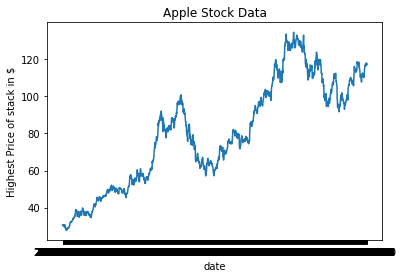

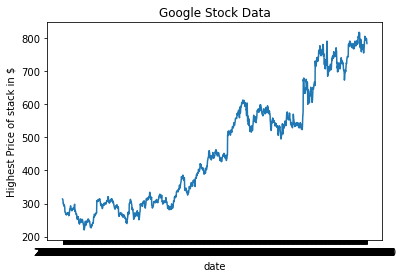

In [22]:
symbols_unique = priceSplitDf['symbol'].unique()

gfg=sns.lineplot(x = "date", y = "high", data = applePriceData)
gfg.set_title("Apple Stock Data")
gfg.set_xlabel("date")
gfg.set_ylabel("Highest Price of stack in $")
plt.show()

gfg2=sns.lineplot(x = "date", y = "high", data = googlePriceData)
gfg2.set_title("Google Stock Data")
gfg2.set_xlabel("date")
gfg2.set_ylabel("Highest Price of stack in $")
plt.show()

#for symbol in symbols_unique:
#    symbolPriceData=priceSplitDf[(priceSplitDf.symbol == symbol)]
#    sns.lineplot(x = "date", y = "high", data = symbolPriceData)
#    plt.show

A clear trend from the 6 year data for daily low and high prices for each stock show that the Tech stocks listed above had shown great value for investment where the
average return hovered around 200% - 800%.

# Method Chaining

In [13]:
import pandas as pd
import numpy as np

In [14]:
    def data_loader(url_or_path_to_csv_file):
    
       # Method Chain 1 (Load data,rename columns, get rid of null values and drop necessary data with missing data)\n",
    
        df1 = (
              pd.read_csv(url_or_path_to_csv_file)
              .sort_values("date") 
            .dropna(axis=0)
            )
    
        return df1

In [15]:
testDf = data_loader("../data/raw/prices-split-adjusted.csv")

In [16]:
testDf

,date,symbol,open,close,low,high,volume
646,2010-01-04,SYMC,18.040001,18.400000,18.010000,18.530001,8322300.0
473,2010-01-04,IFF,41.509998,42.009998,41.500000,42.020000,286000.0
474,2010-01-04,ILMN,31.120001,30.549999,30.420000,31.230000,1793700.0
475,2010-01-04,INTC,20.790001,20.879999,20.730000,21.030001,47800900.0
476,2010-01-04,INTU,31.090000,30.809999,30.770000,31.150000,2353000.0
...,...,...,...,...,...,...,...
850922,2016-12-30,ES,55.599998,55.230000,55.070000,55.740002,1446800.0
850921,2016-12-30,EQT,65.699997,65.400002,65.050003,66.470001,1242100.0
850920,2016-12-30,EQR,63.590000,64.360001,63.189999,64.440002,1534000.0
850933,2016-12-30,EXR,75.669998,77.239998,75.110001,77.300003,884400.0


In [17]:
testDf.describe().T

,count,mean,std,min,25%,50%,75%,max
open,851264.0,6.499362e+01,7.520389e+01,1.66,3.127000e+01,4.846000e+01,7.512000e+01,1.584440e+03
close,851264.0,6.501191e+01,7.520122e+01,1.59,3.129278e+01,4.848000e+01,7.514000e+01,1.578130e+03
low,851264.0,6.433654e+01,7.445952e+01,1.50,3.094000e+01,4.797000e+01,7.440000e+01,1.549940e+03
high,851264.0,6.563975e+01,7.590686e+01,1.81,3.162000e+01,4.896000e+01,7.585000e+01,1.600930e+03
volume,851264.0,5.415113e+06,1.249468e+07,0.00,1.221500e+06,2.476250e+06,5.222500e+06,8.596434e+08


In [18]:
testDf.describe(include=[np.number]) 

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


# Module Testing

In [19]:

testDf = p1.load_and_process("../data/raw/prices-split-adjusted.csv")

In [20]:
testDf

,date,symbol,open,close,low,high,volume
646,2010-01-04,SYMC,18.040001,18.400000,18.010000,18.530001,8322300.0
473,2010-01-04,IFF,41.509998,42.009998,41.500000,42.020000,286000.0
474,2010-01-04,ILMN,31.120001,30.549999,30.420000,31.230000,1793700.0
475,2010-01-04,INTC,20.790001,20.879999,20.730000,21.030001,47800900.0
476,2010-01-04,INTU,31.090000,30.809999,30.770000,31.150000,2353000.0
...,...,...,...,...,...,...,...
850922,2016-12-30,ES,55.599998,55.230000,55.070000,55.740002,1446800.0
850921,2016-12-30,EQT,65.699997,65.400002,65.050003,66.470001,1242100.0
850920,2016-12-30,EQR,63.590000,64.360001,63.189999,64.440002,1534000.0
850933,2016-12-30,EXR,75.669998,77.239998,75.110001,77.300003,884400.0


# Task 4
See group notebook.